### LOADING VGG16 WITH PRETRAINED WEIGHTS

In [2]:
from keras.applications import VGG16
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

model = VGG16(weights = 'imagenet')

In C:\Users\SWARUP TRIPATHY\Anaconda3\envs\cv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SWARUP TRIPATHY\Anaconda3\envs\cv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SWARUP TRIPATHY\Anaconda3\envs\cv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\SWARUP TRIPATHY\Anaconda3\envs\cv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SWARUP T

### LOADING OUR TEST IMAGE TIGER OR ANY OTHER ANIMAL

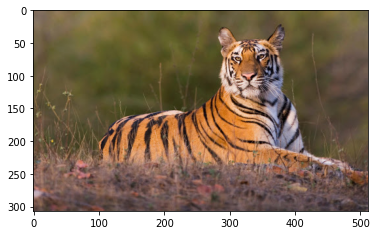

In [9]:
img_path = r'C:\Users\SWARUP TRIPATHY\Desktop\tiger.jpg'
img1 = image.load_img(img_path)
plt.imshow(img1)

img = image.load_img(img_path, target_size = (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

### IMAGENET PREDICTION FOR THE ABOVE IMAGE

In [10]:
preds = model.predict(x)
print("Predicted: ", decode_predictions(preds, top = 3)[0])

40960/35363 [==================================] - 0s 3us/step
Predicted:  [('n02129604', 'tiger', 0.9013013), ('n02123159', 'tiger_cat', 0.09723496), ('n02391049', 'zebra', 0.00077318016)]


### GETTING THE CLASS INDEX

In [11]:
np.argmax(preds[0])

292

### Output the feature map of the block5_conv3 layer, the last convolutional layer in VGG16

In [14]:
tiger_output = model.output[:,292]
last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(tiger_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis = (0,1,2))

iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis = -1)

### PLOTTING OUT HEATMAP

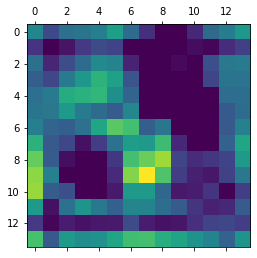

In [15]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

### OPENCV TO OVERLAY HEATMAP INTO THE IMAGE

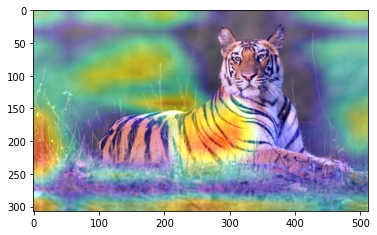

In [16]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap,(img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img

save_img_path = r'C:\Users\SWARUP TRIPATHY\Desktop\tiger_cam.jpg'

cv2.imwrite(save_img_path, superimposed_img)
img1 = image.load_img(save_img_path)
plt.imshow(img1)